In [343]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("survey_results_public.csv")

In [344]:
print(df.columns)

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [345]:
df=df[['Country', 'EdLevel', 'YearsCodePro', 'Employment',
       'ConvertedCompYearly']]
df=df.rename({"ConvertedCompYearly":"Salary"},axis=1)

In [346]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [347]:
df=df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [349]:
df=df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [350]:
df=df[df["Employment"]=="Employed, full-time"]
df=df.drop("Employment",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   EdLevel       39155 non-null  object 
 2   YearsCodePro  39155 non-null  object 
 3   Salary        39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [351]:
df["Country"].value_counts()

Country
United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

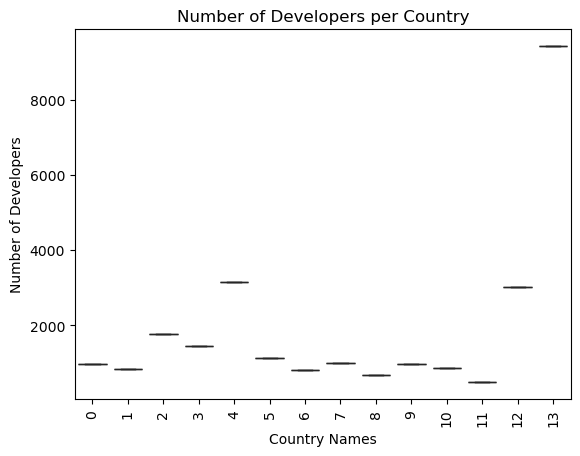

In [390]:
country_counts = df["Country"].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Plot a barplot
sns.boxplot(x="Country", y="Count", data=country_counts, color='green')

plt.xlabel("Country Names")
plt.ylabel("Number of Developers")
plt.title("Number of Developers per Country")
plt.xticks(rotation=90)  # Rotate x labels if there are many countries
plt.show()


In [354]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for category, count in categories.items():
        if count >= cutoff:
            categorical_map[category] = category
        else:
            categorical_map[category] = "Other"
    return categorical_map

# Apply the function to create a country_map
country_map = shorten_categories(df.Country.value_counts(), 500)

# Map the countries in the DataFrame
df["Country"] = df["Country"].map(country_map)

df.head()

,Country,EdLevel,YearsCodePro,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,United States of America,Some college/university study without earning ...,3,135000.0


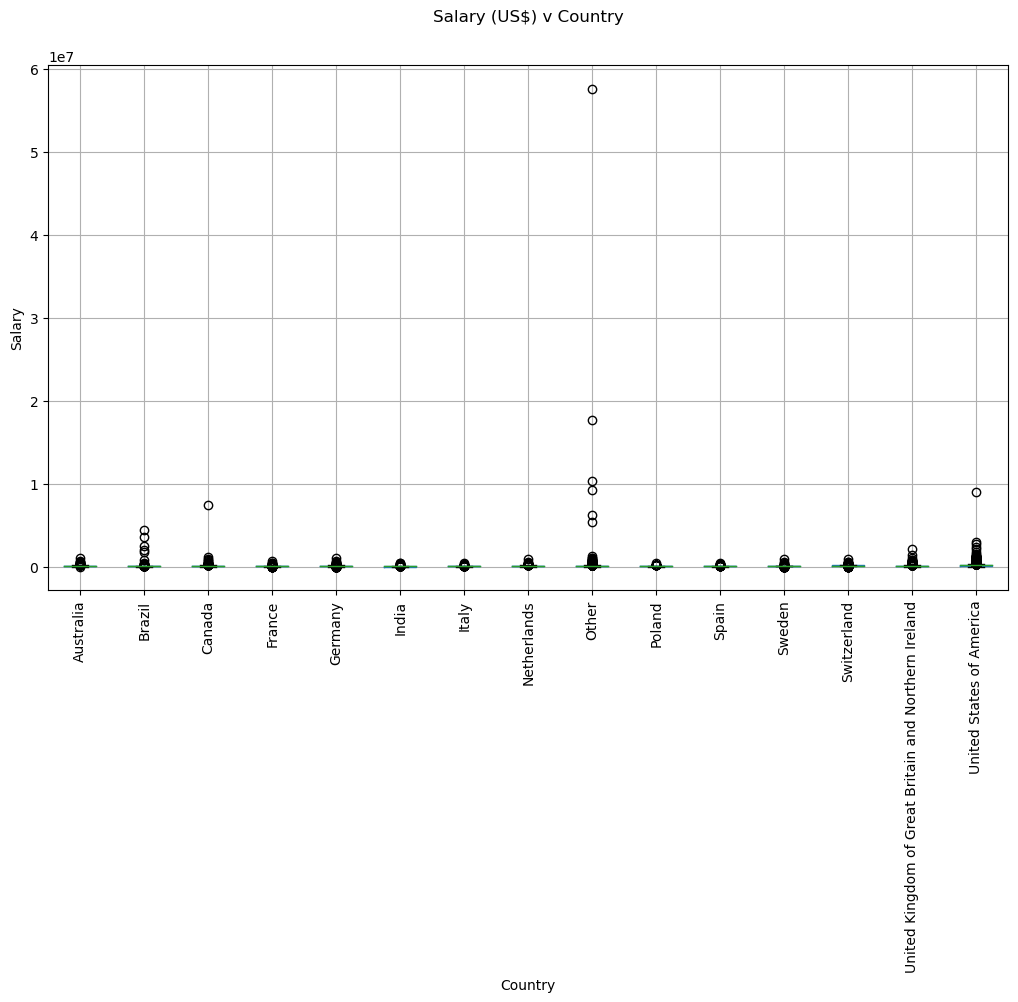

In [355]:
fig ,ax =plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [356]:
# Filter the DataFrame based on the Salary column
df = df[(df["Salary"] <= 250000) & (df["Salary"] >= 10000)]

# Further filter out rows where the Country is 'Other'
df = df[df["Country"] != 'Other']


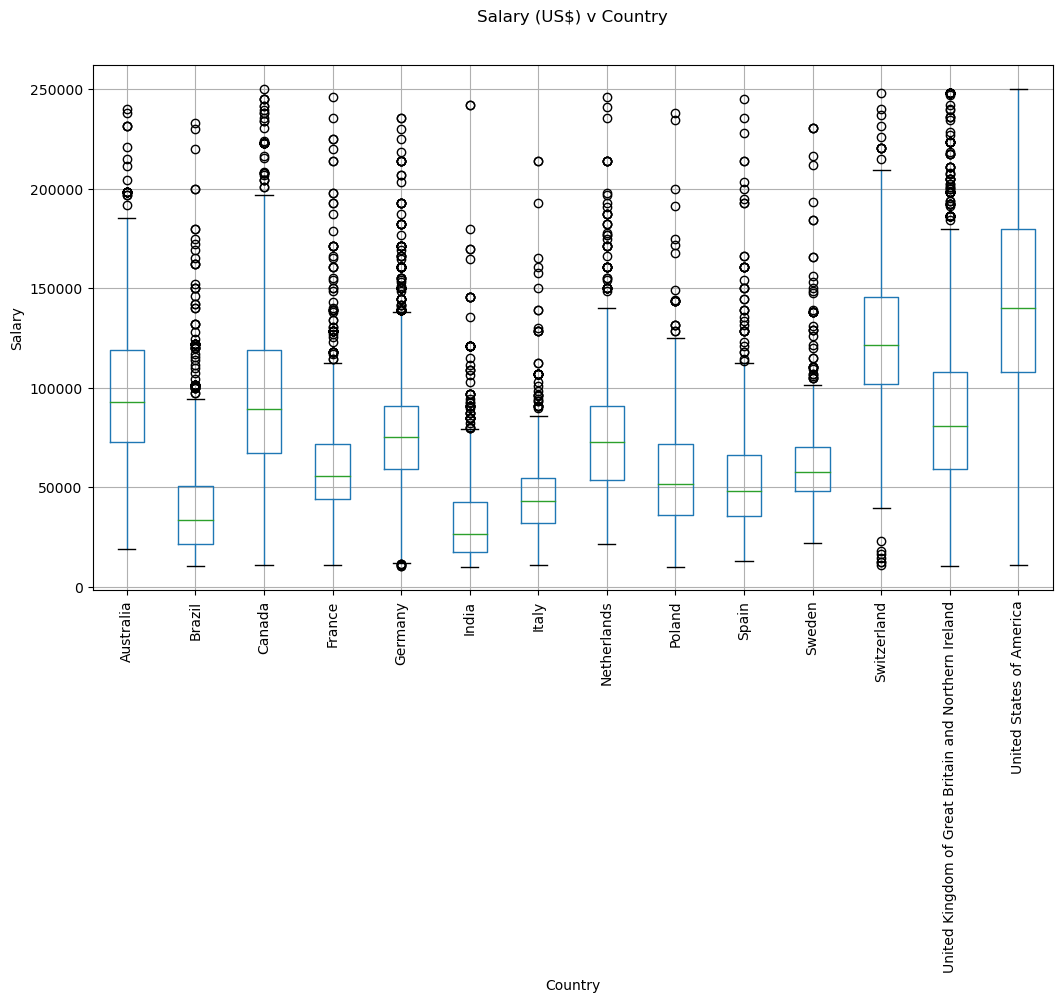

In [357]:
fig ,ax =plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [392]:
df["Country"].value_counts

array([13, 13, 12, ...,  1,  5,  3])

In [358]:
df["YearsCodePro"].unique()

array(['23', '7', '21', '3', '9', 'Less than 1 year', '10', '2', '6',
       '14', '5', '15', '19', '13', '16', '28', '24', '25', '12', '4',
       '20', '8', '18', '27', '17', '43', '38', '33', '29', '22', '1',
       '11', '42', '26', '31', '30', '36', '39', '34', '40', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [359]:
def clean_experience(x):
    if x== 'More than 50 years' :
        return 50
    if x=='Less than 1 year' :
        return 0.5
    return float(x)

df['YearsCodePro'] =df['YearsCodePro'].apply(clean_experience)

In [360]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [361]:
def clean_education(x):
    if "Bachelor's degree" in x:
        return "Bachelor's degree"
    if "Master's degree" in x :
        return "Master's degree"
    if "Professional degree" in x or "Other doctoral" in x:
        return "Post grad"
    return "Less than a Bachelores"
df["EdLevel"]=df["EdLevel"].apply(clean_education)

In [362]:
df["EdLevel"].unique()

array(['Less than a Bachelores', 'Post grad'], dtype=object)

In [363]:
from sklearn.preprocessing import LabelEncoder
le_education=LabelEncoder()
df["EdLevel"]=le_education.fit_transform(df["EdLevel"])
df["EdLevel"].unique()

array([0, 1])

In [364]:
df.Country.value_counts()

Country
United States of America                                9430
Germany                                                 3148
United Kingdom of Great Britain and Northern Ireland    3009
Canada                                                  1757
France                                                  1441
India                                                   1130
Netherlands                                              983
Australia                                                962
Spain                                                    957
Sweden                                                   849
Brazil                                                   840
Italy                                                    814
Poland                                                   684
Switzerland                                              480
Name: count, dtype: int64

In [365]:
le_country=LabelEncoder()
df["Country"]=le_country.fit_transform(df["Country"])
df["Country"].unique()

array([13, 12,  0,  7,  4, 10,  3,  9,  1,  6,  2, 11,  5,  8])

In [366]:
x= df.drop("Salary",axis=1)
y=df["Salary"]

In [367]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x,y.values)

LinearRegression()

In [368]:
y_pred=linear_reg.predict(x)

In [369]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
error=np.sqrt(mean_squared_error(y,y_pred))

In [370]:
error

45867.75335084808

In [371]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg=DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x,y.values)

DecisionTreeRegressor(random_state=0)

In [372]:
y_pred=dec_tree_reg.predict(x)

In [373]:
error=np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$35,145.52


In [374]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg=RandomForestRegressor(random_state=0)
random_forest_reg.fit(x,y.values)

RandomForestRegressor(random_state=0)

In [375]:
y_pred=random_forest_reg.predict(x)

In [376]:
error=np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$35,180.57


In [377]:
from sklearn.model_selection import GridSearchCV

max_depth=[None , 2,4,6,8,10,12]
parameters={"max_depth":max_depth}

regressor=DecisionTreeRegressor(random_state=0)
gs=GridSearchCV(regressor,parameters,scoring="neg_mean_squared_error")
gs.fit(x,y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [378]:
regressor=gs.best_estimator_

regressor.fit(x,y.values)
y_pred=regressor.predict(x)
error=np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$35,772.22


In [379]:
x

,Country,EdLevel,YearsCodePro
2,13,0,23.0
3,13,0,7.0
5,12,0,21.0
6,13,0,3.0
7,13,0,3.0
...,...,...,...
89156,13,0,8.0
89158,10,0,8.0
89162,1,0,24.0
89167,5,0,2.0


In [380]:
# LabelEncoder içinde belirli bir ülkenin olup olmadığını kontrol eden lambda fonksiyonu
country_to_check = "United States of America"
is_in_encoder = lambda x: x in le_country.classes_

# Sonucu kontrol et ve ekrana yazdır
if is_in_encoder(country_to_check):
    print(f"{country_to_check} 'le_country' içinde mevcut.")
else:
    print(f"{country_to_check} 'le_country' içinde bulunamadı.")

United States of America 'le_country' içinde mevcut.


In [381]:
#country,edlevel,yearscodepro
X=np.array([["United States of America","Post grad",15]])
X

array([['United States of America', 'Post grad', '15']], dtype='<U24')

In [382]:
X[:,0]=le_country.transform(X[:,0])
X[:,1]=le_education.transform(X[:,1])
X=X.astype(float)
X

array([[13.,  1., 15.]])

In [383]:
y_pred=regressor.predict(X)
y_pred

/Users/bilgenurbilgetay/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([167636.75362319])

In [384]:
import pickle

In [385]:
data={"model":regressor,"le_country":le_country,"le_education":le_education}
with open('saved_steps.pkl',"wb") as file:
    pickle.dump(data,file)

In [386]:
with open("saved_steps.pkl","rb") as file:
    data=pickle.load(file)
    
regressor_loaded=data["model"]
le_country=data["le_country"]
le_education=data["le_education"]

In [387]:
y_pred=regressor_loaded.predict(X)
y_pred

/Users/bilgenurbilgetay/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([167636.75362319])

In [388]:
df.Country.value_counts()

Country
13    9430
4     3148
12    3009
2     1757
3     1441
5     1130
7      983
0      962
9      957
10     849
1      840
6      814
8      684
11     480
Name: count, dtype: int64